In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

#df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)

df_wine = pd.read_csv('data/wine_data.csv',header=None)      
df_wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [2]:
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
       'Alcalinity of ash', 'Magnesium', 'Total phenols',
       'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
       'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
       'Proline']

df_wine

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# 標準化訓練及測試數據

In [3]:
#Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values # 0為 Class label ,  1之後為13個特徵
print('# of data:',X.shape[0])
print('# of features:',X.shape[1])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train_std=sc.fit_transform(X_train)
X_test_std=sc.fit_transform(X_test)


# of data: 178
# of features: 13


# 求Features的共變異係數矩陣

Estimate a covariance matrix, given data and weights.

Covariance indicates the level to which two variables vary together. If we examine N-dimensional samples, X = [x_1, x_2,... x_N]^T, then the covariance matrix element C_{ij} is the covariance of x_i and x_j. The element C_{ii} is the variance of x_i.

In [4]:
#求共變異係數矩陣的特徵向量及特徵值
cov_mat = np.cov(X_train_std.T)
print("共變異係數矩陣.shape=",cov_mat.shape)
print("共變異係數矩陣=",cov_mat)

共變異係數矩陣.shape= (13, 13)
共變異係數矩陣= [[ 1.00813008  0.08797701  0.23066952 -0.32868099  0.2141631   0.35576761
   0.2991246  -0.16913744  0.09649074  0.56962271 -0.04781543  0.07403492
   0.63277882]
 [ 0.08797701  1.00813008  0.2016416   0.30658143 -0.06030917 -0.30124242
  -0.41221162  0.36616593 -0.19190146  0.30749173 -0.54992807 -0.39352761
  -0.20253906]
 [ 0.23066952  0.2016416   1.00813008  0.44971971  0.18321413  0.12235533
   0.06130256  0.18655693 -0.02607834  0.24555355 -0.10928021 -0.01820002
   0.15948032]
 [-0.32868099  0.30658143  0.44971971  1.00813008 -0.08930998 -0.37018442
  -0.41804463  0.40212108 -0.25765667 -0.03090225 -0.25313262 -0.28934372
  -0.48504311]
 [ 0.2141631  -0.06030917  0.18321413 -0.08930998  1.00813008  0.16513295
   0.14458703 -0.30763563  0.27228619  0.1260674   0.05792599  0.01596134
   0.31461066]
 [ 0.35576761 -0.30124242  0.12235533 -0.37018442  0.16513295  1.00813008
   0.88119961 -0.45396901  0.6196806  -0.06935051  0.45718802  0.72214462
   0

In [5]:
#求共變異係數矩陣的特徵向量及特徵值
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print("特徵向量(Eigen Vector)=",eigen_vecs.shape)
print("特徵值(Eigen Value)=",eigen_vals)

特徵向量(Eigen Vector)= (13, 13)
特徵值(Eigen Value)= [4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


In [6]:
#計算解釋變異數比率 各特徵值/特徵值總和
tot = sum(eigen_vals)
var_exp = [ (i/tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("各特徵值變異數比率：\n",var_exp)
print()
print("特徵值變異數比率累加：\n",cum_var_exp)

各特徵值變異數比率：
 [0.3732964772349068, 0.18818926106599565, 0.10896790724757804, 0.07724389477124863, 0.06478594601826185, 0.04592013811478148, 0.03986935597634708, 0.02521914260726156, 0.022581806817679663, 0.018309244719526892, 0.016353362655051457, 0.012842705837492717, 0.006420756933868292]

特徵值變異數比率累加：
 [0.37329648 0.56148574 0.67045365 0.74769754 0.81248349 0.85840362
 0.89827298 0.92349212 0.94607393 0.96438317 0.98073654 0.99357924
 1.        ]


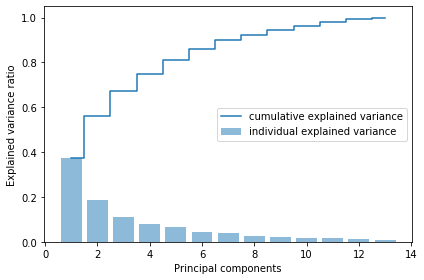

In [7]:
#繪圖：解釋變異數比率，各特徵值/特徵值總和
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# 特徵轉換
由累積梯階圖，我們可以發現前 2 個就包含了 60% 的解釋力。<br>
當我們決定使用 2 個特徵向量在作為我們的主成分軸後，接著便是要做特徵轉換：<br>

* 選取 k 個 特徵值最大的相對應 特徵向量<br>
* 建立投影矩陣 *W* = *d* x *K*<br>
* 使用投影矩陣 W將輸入資料集*n* x *d*轉換成 *n* x *k* 。

Matrix W:
 [[ 0.14669811  0.50417079]
 [-0.24224554  0.24216889]
 [-0.02993442  0.28698484]
 [-0.25519002 -0.06468718]
 [ 0.12079772  0.22995385]
 [ 0.38934455  0.09363991]
 [ 0.42326486  0.01088622]
 [-0.30634956  0.01870216]
 [ 0.30572219  0.03040352]
 [-0.09869191  0.54527081]
 [ 0.30032535 -0.27924322]
 [ 0.36821154 -0.174365  ]
 [ 0.29259713  0.36315461]]


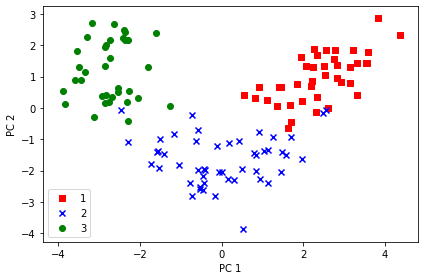

In [8]:
# Make a list of (eigenvalue, eigenvector) tuples
eigen_pairs = [(np.abs(eigen_vals[i]), eigen_vecs[:, i])
               for i in range(len(eigen_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eigen_pairs.sort(key=lambda k: k[0], reverse=True)

# 計算投影矩陣 13x2
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis]))
print('Matrix W:\n', w)

# 資料集特徵轉換 並且圖示出來
X_train_pca = X_train_std.dot(w)
colors = ['r', 'b', 'g']
markers = ['s', 'x', 'o']

for l, c, m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], 
                X_train_pca[y_train == l, 1], 
                c=c, label=l, marker=m)

plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

# Principal component analysis in scikit-learn
> 直接使用 scikit-learn decomposition PCA 類別：

In [11]:
from sklearn.decomposition import PCA

#依據重要性權重，我們可以權衡比重，試著設定前幾個特徵向量，例如2個。
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)

tot = sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("各特徵值變異數比率：",pca.explained_variance_ratio_)
print("特徵值變異數比率累加：",cum_var_exp)

各特徵值變異數比率： [0.37329648 0.18818926]
特徵值變異數比率累加： [0.37329648 0.56148574 0.67045365 0.74769754 0.81248349 0.85840362
 0.89827298 0.92349212 0.94607393 0.96438317 0.98073654 0.99357924
 1.        ]


>畫圖 ：解釋變異數比率 ，各特徵值/特徵值總和

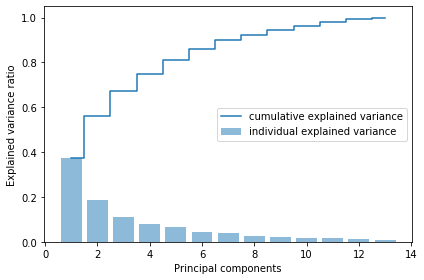

In [12]:
plt.bar(range(1, 14), var_exp, alpha=0.5, align='center',
        label='individual explained variance')
plt.step(range(1, 14), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

>依據重要性權重，我們可以權衡比重，試著設定前幾個特徵向量，例如2個。

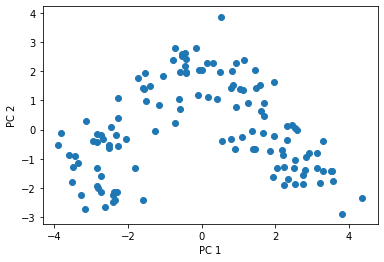

In [13]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [14]:
from sklearn.linear_model import LogisticRegression

pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)

lr = LogisticRegression()
lr = lr.fit(X_train_pca, y_train)

# 畫出PCA轉換後的數據集散點圖

In [15]:
from matplotlib.colors import ListedColormap
from utility import plot_decision_regions

# 使用LogisticRegression 並用兩個 PCA主成分做分類
> 訓練集資料

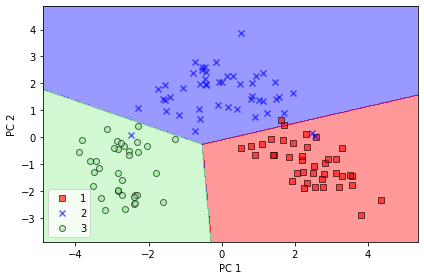

In [16]:
plot_decision_regions(X_train_pca, y_train, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()

plt.show()

>測試集資料

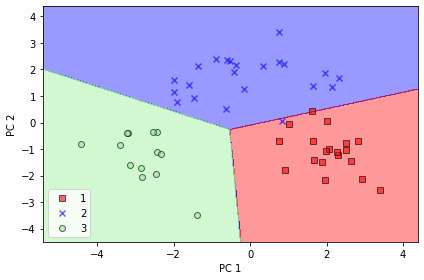

In [17]:
plot_decision_regions(X_test_pca, y_test, classifier=lr)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.legend(loc='lower left')
plt.tight_layout()
# plt.savefig('images/05_05.png', dpi=300)
plt.show()